# import

In [1]:
import pandas as pd
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# preprocessing data

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """


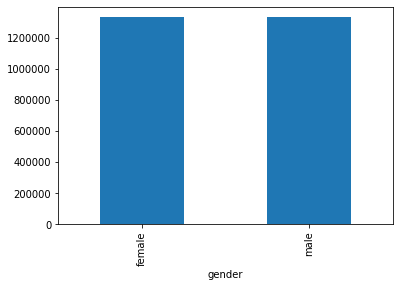

In [2]:
import matplotlib
%matplotlib inline
#The data has been cleared
train_data=pd.read_csv('./gender/data_train.csv')
train_data.groupby('gender').size().plot('bar')

In [3]:
le = LabelEncoder()
le.fit(train_data.gender)

LabelEncoder()

# train data

In [4]:
X=train_data.name
y=le.transform(train_data.gender)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [5]:
cv = CountVectorizer()
tf = TfidfTransformer()

list_model=[LogisticRegression(),LinearSVC()]
result=[]
final_model={}
for m in list_model:
    model = Pipeline([('cv',cv),('tf',tf),('clf',m)])
    model.fit(X_train,y_train)
    y_result=model.predict(X_test)
    acc=accuracy_score(y_result, y_test)
    result.append({'model':str(m.__class__.__name__),'accuracy':acc})
    final_model.update({str(m.__class__.__name__):model})
    print('=============')
    print(m.__class__.__name__)
    print(acc)
    print(classification_report(y_test,y_result))

/root/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression
0.8961929978521134
              precision    recall  f1-score   support

           0       0.92      0.87      0.89    266668
           1       0.88      0.92      0.90    265483

    accuracy                           0.90    532151
   macro avg       0.90      0.90      0.90    532151
weighted avg       0.90      0.90      0.90    532151

LinearSVC
0.9135865571989905
              precision    recall  f1-score   support

           0       0.92      0.91      0.91    266668
           1       0.91      0.92      0.91    265483

    accuracy                           0.91    532151
   macro avg       0.91      0.91      0.91    532151
weighted avg       0.91      0.91      0.91    532151



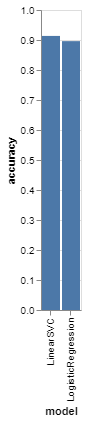

In [6]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(pd.DataFrame(result)).mark_bar().encode(
x='model',
y='accuracy')

In [7]:
from sklearn.externals import joblib 

model = final_model['LinearSVC']

# Save the model as a pickle in a file 
joblib.dump(model, 'model_gender.pkl') 
  
# Load the model from the file 
load_model = joblib.load('model_gender.pkl')  
  
# Use the loaded model to make predictio
load_model.predict(['aril','indra','zahra','fahadh','roihatul','yuanisa']) 

/root/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([1, 1, 0, 1, 0, 0])